## _Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors._

In [49]:
# loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
df = pd.read_csv('E:\\PRODIGY INFOTECH\\Dataset_05\\US_Accidents_March23.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
print(f'Number of ROWS:{df.shape[0]}')
print(f'Number of COLUMNS:{df.shape[1]}')

Number of ROWS:7728394
Number of COLUMNS:46


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Gathering Information about Dataset
- Duplicate values
- null values
- missing values

In [ ]:
df.duplicated().sum()

0

In [ ]:
# finding null values
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [ ]:
# finding percentage of missing values

missing_data = df.isna().sum().sort_values(ascending=False) / len(df) * 100
missing_data

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

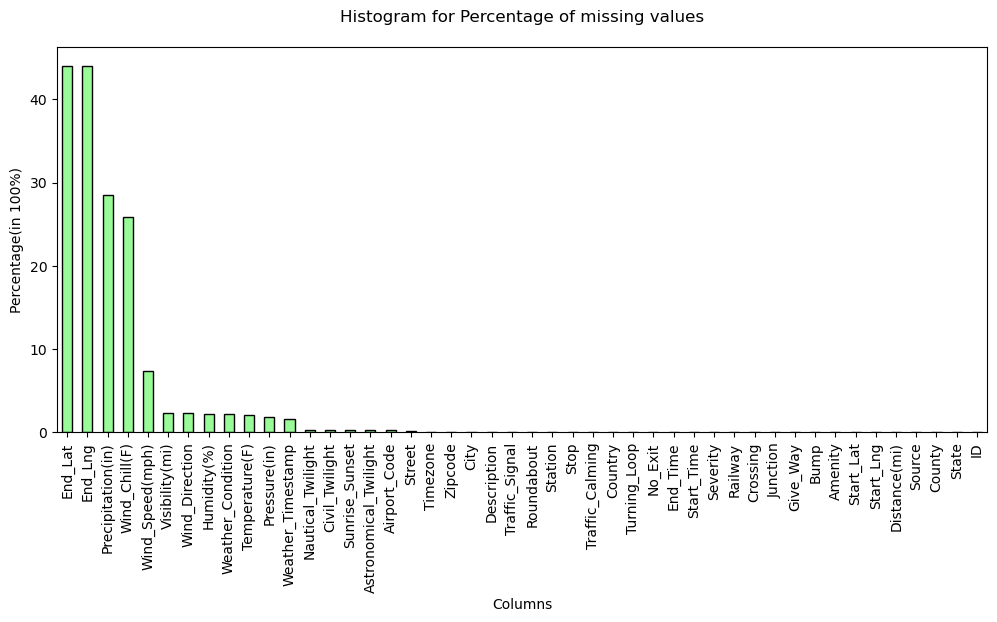

In [ ]:
plt.figure(figsize=(12,5))
missing_data.plot(kind = 'bar',color = 'palegreen',edgecolor = 'k')
plt.xlabel('Columns')
plt.ylabel("Percentage(in 100%)")
plt.title('Histogram for Percentage of missing values\n')
plt.show()

In [ ]:
df['City'].nunique()

13678

In [ ]:
# finding the number of accidents in each city

df['City'].value_counts()[:30].sort_values(ascending=False)

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
San Antonio       37961
Greenville        37802
Saint Paul        37383
Seattle           36564
Portland          35399
San Jose          34536
Indianapolis      33219
Chicago           32035
Tampa             31193
Denver            30557
Name: count, dtype: int64

From this we get that the city Miai has the most number of accidents , then Houstan and so on

### Dropping Four Columns [End_Lng, End_Lat ] having high no. of Missing Values.
However Dropping Rows w.r.t to columns having least percentage of missing values (do not effect much to data with 4.2 million records)

In [ ]:
df = df.drop(columns = ["End_Lng", "End_Lat"], axis=0)

In [ ]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

In [ ]:
df = df.dropna(subset = ['Visibility(mi)','Weather_Condition','Humidity(%)','Temperature(F)','Wind_Direction'],axis=0)

In [ ]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    4
Street                     10372
City                         242
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1771570
Humidity(%)                    0
Pressure(in)                5417
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)           375762
Precipitation(in)        2041941
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

# EDA

In [ ]:
state_counts = df['State'].value_counts()
state_counts

State
CA    1675669
FL     855628
TX     567831
SC     372394
NY     340891
NC     332933
PA     287258
VA     281951
MN     185152
OR     174595
IL     166957
TN     166090
GA     164666
AZ     162725
MI     161054
LA     146970
NJ     133219
OH     116672
MD     111232
WA     106552
AL      98565
CO      88301
UT      87529
OK      82546
MO      75596
CT      70381
IN      65313
MA      58992
WI      34324
KY      31873
NE      28620
MT      26954
IA      25335
AR      21890
NV      21096
KS      18209
DC      17599
RI      16225
MS      14793
DE      13897
WV      13506
NM      10131
ID      10114
NH      10013
ND       3136
WY       3063
ME       2645
VT        885
SD        278
Name: count, dtype: int64

In [ ]:
print("Total No. of State in Dataset: ", len(df['State'].unique()))

Total No. of State in Dataset:  49


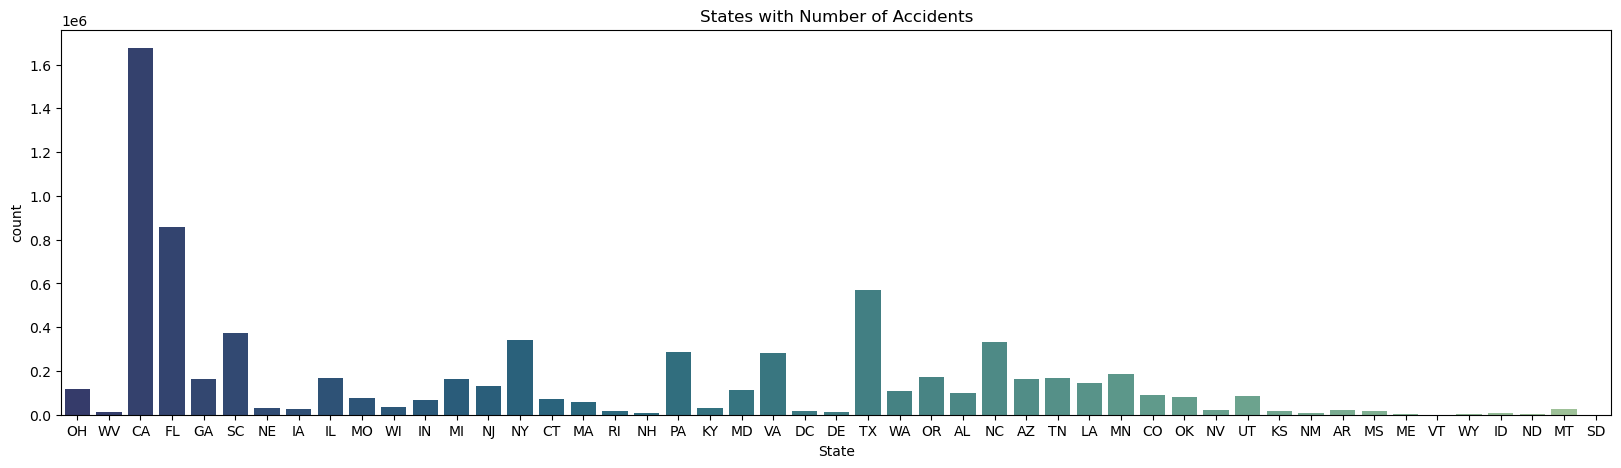

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='State',data=df,palette = "crest_r")
plt.title('States with Number of Accidents')
plt.show()

California (CA) is the state with maximum number of accidents

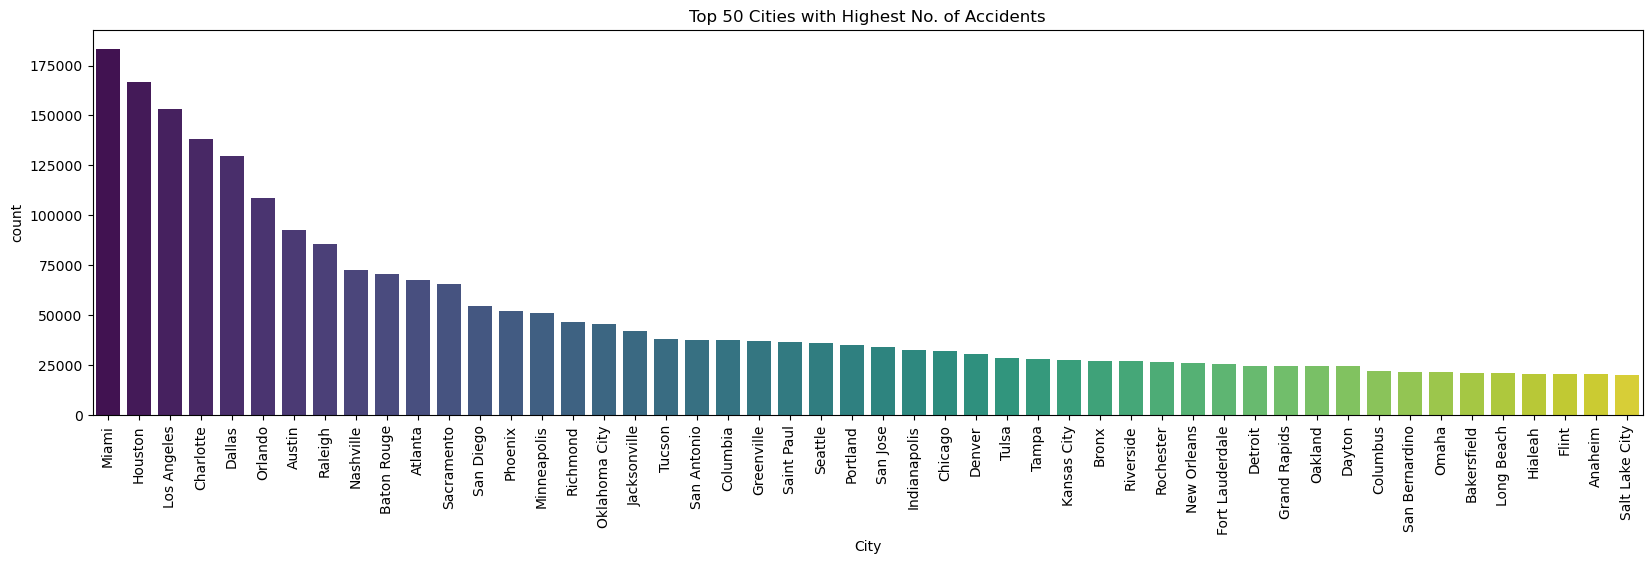

In [ ]:
ax = plt.subplots(figsize = (20,5))
sns.countplot(x="City", data=df, order=df.City.value_counts().iloc[:50].index,palette = "viridis")
plt.title("Top 50 Cities with Highest No. of Accidents")
plt.xticks(rotation=90)
plt.show()

In [ ]:
cities_by_accident = df['City'].value_counts()
cities_by_accident[:15]

City
Miami          183479
Houston        166764
Los Angeles    153464
Charlotte      138082
Dallas         129932
Orlando        108832
Austin          92676
Raleigh         85822
Nashville       72771
Baton Rouge     70765
Atlanta         67520
Sacramento      65505
San Diego       54832
Phoenix         52259
Minneapolis     51288
Name: count, dtype: int64

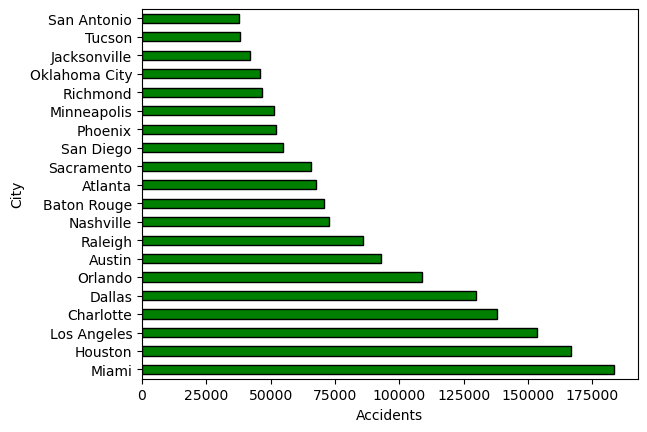

In [ ]:
cities_by_accident[:20].plot(kind='barh',color='green',edgecolor='k')
plt.xlabel('Accidents')
plt.show()

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident > 1000]
low_accident_cities = cities_by_accident[cities_by_accident <= 1000]

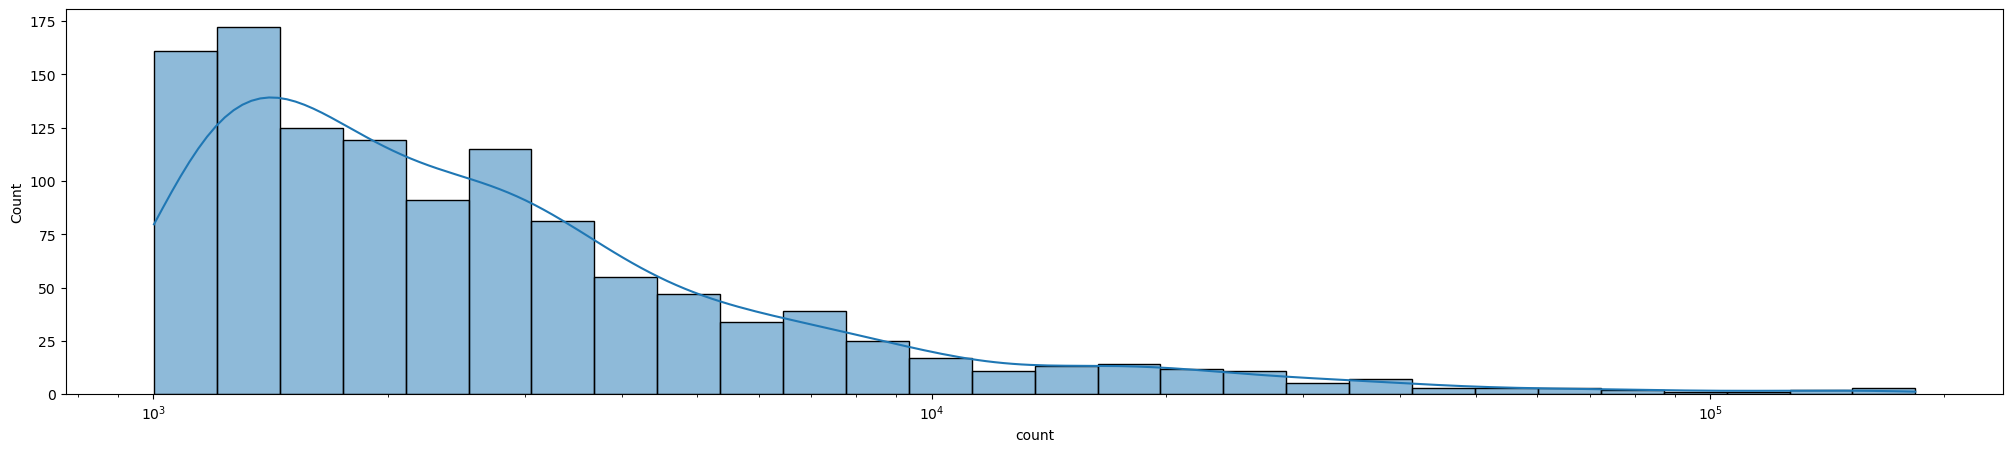

In [ ]:
# distribution of high accident cities
plt.figure(figsize=(25,5))
sns.histplot(high_accident_cities, log_scale=True, kde=True)
plt.show()

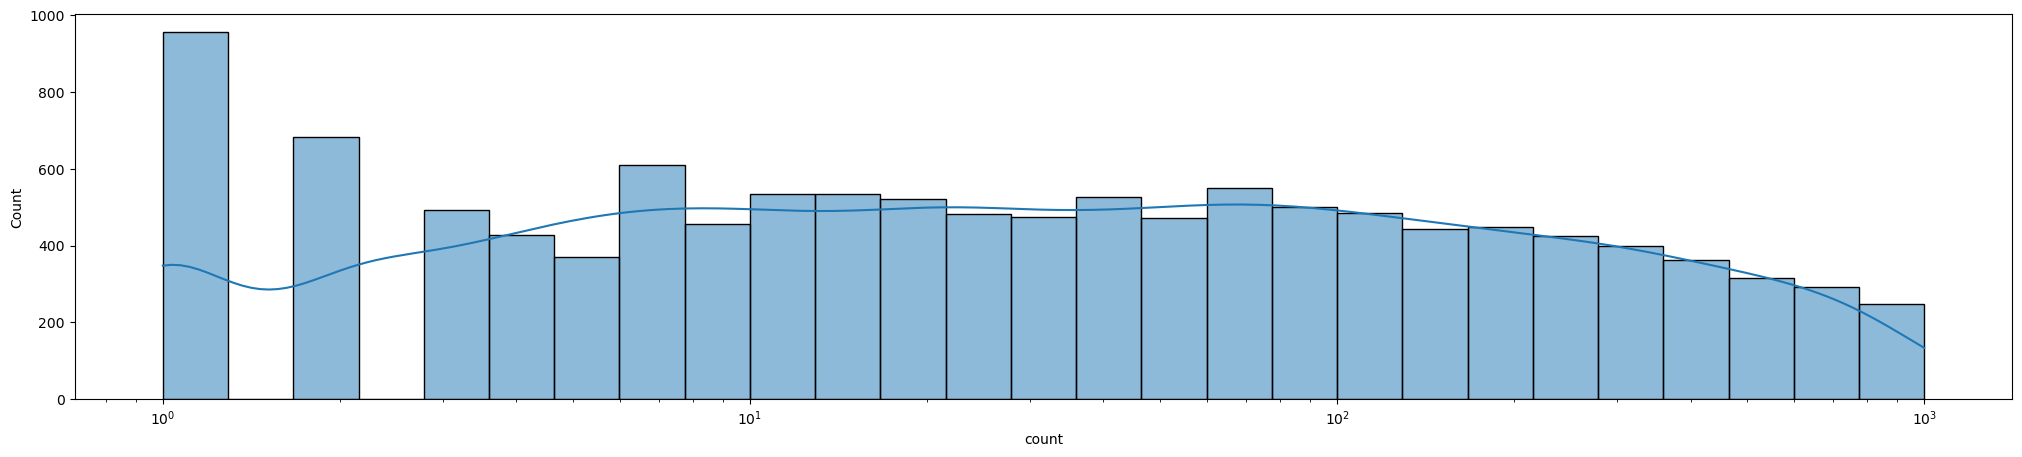

In [ ]:
# distribution of low accident cities
plt.figure(figsize=(25,5))
sns.histplot(low_accident_cities, log_scale=True, kde=True)
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


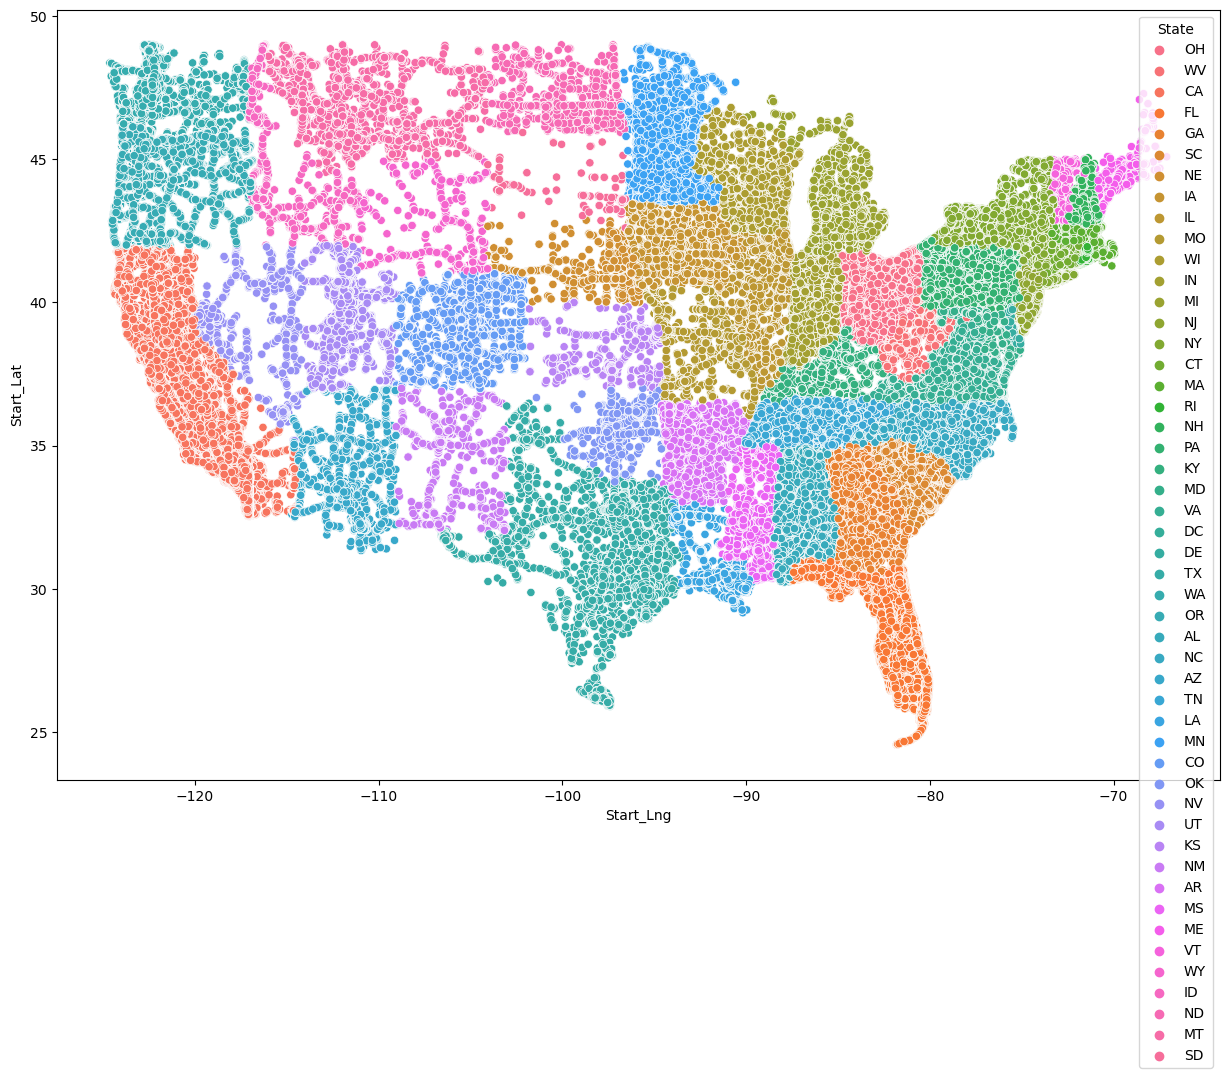

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.show()

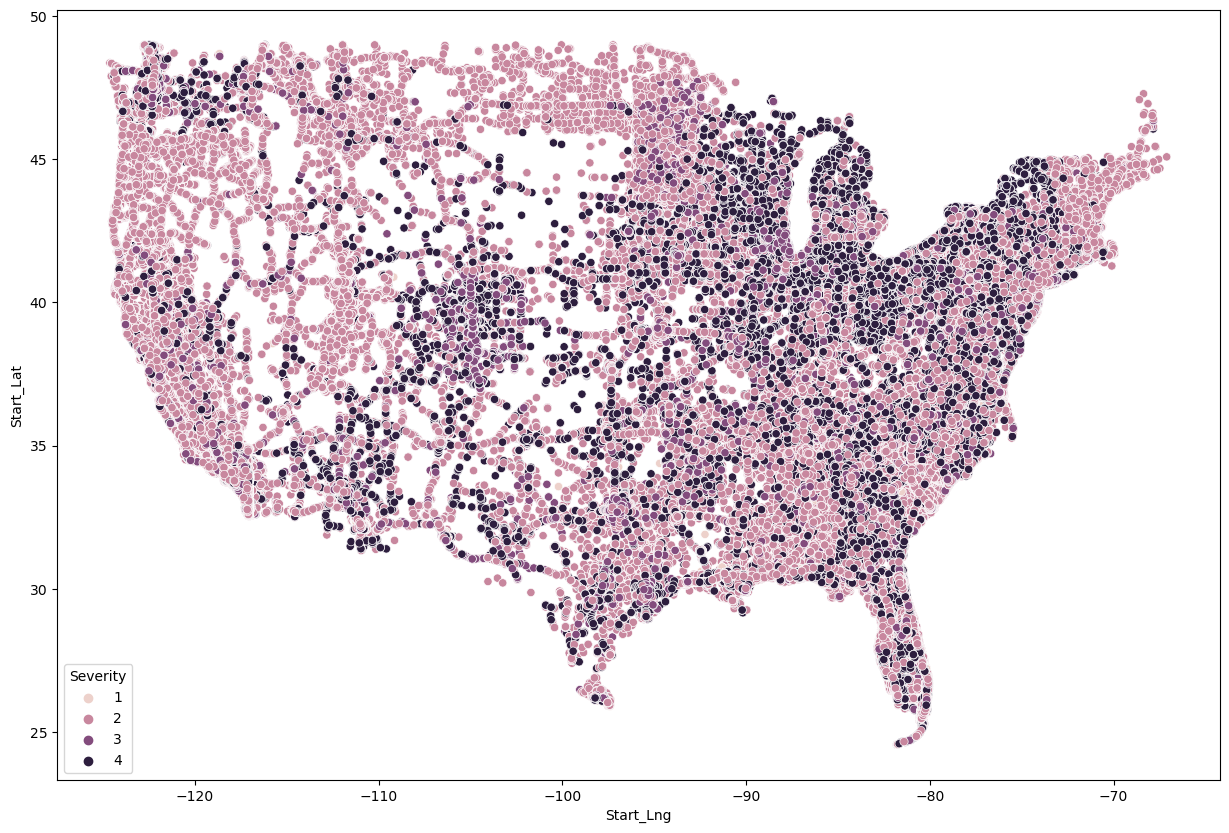

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['Severity'])
plt.show()